In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [4]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


# EDA

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_n=train[[c for c in train.columns if train[c].dtypes!='O']].copy()
test_n=test[[c for c in test.columns if test[c].dtypes!='O']].copy()

train_c=train[[c for c in train.columns if train[c].dtypes=='O']].copy()
test_c=test[[c for c in test.columns if test[c].dtypes=='O']].copy()

In [8]:
train_n

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


# EDA on numerical data

In [9]:
corrmat = train_n.corr()


In [10]:
n=15
top15_cols=corrmat.nlargest(n,'SalePrice')['SalePrice'].index

In [11]:
top15_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

<Axes: >

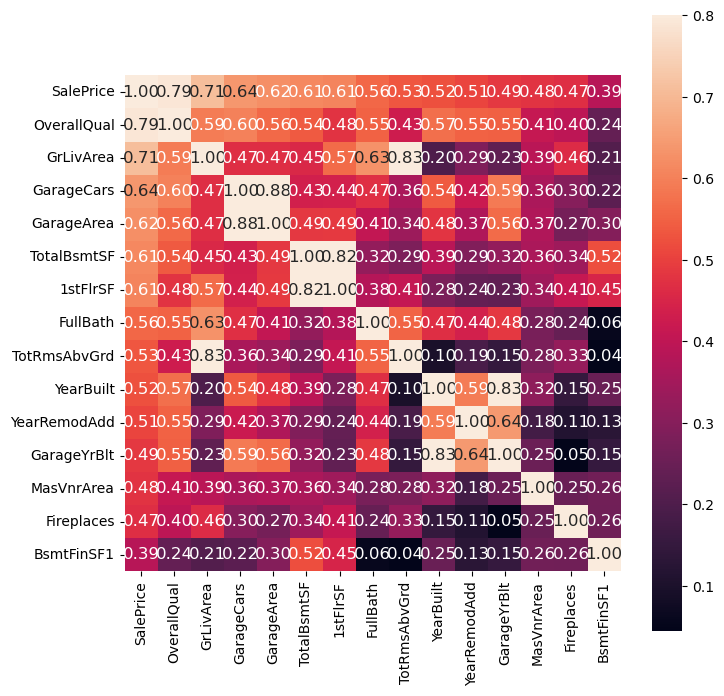

In [12]:
corrmat_top15 = train_n[top15_cols].corr()
fig1,ax1=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat_top15,vmax=.8, square=True,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

## Co-linearity:

We will choose only one feature from each co-linear pair.

GarageCars and GarageArea
TotalBsmtSF and 1stFirSF
TotRmsAbvGrd and GrLIveArea
I choose GarageArea,TotalBsmtSF,GrLIveArea.I have made this decision by plotting below scatter plots.

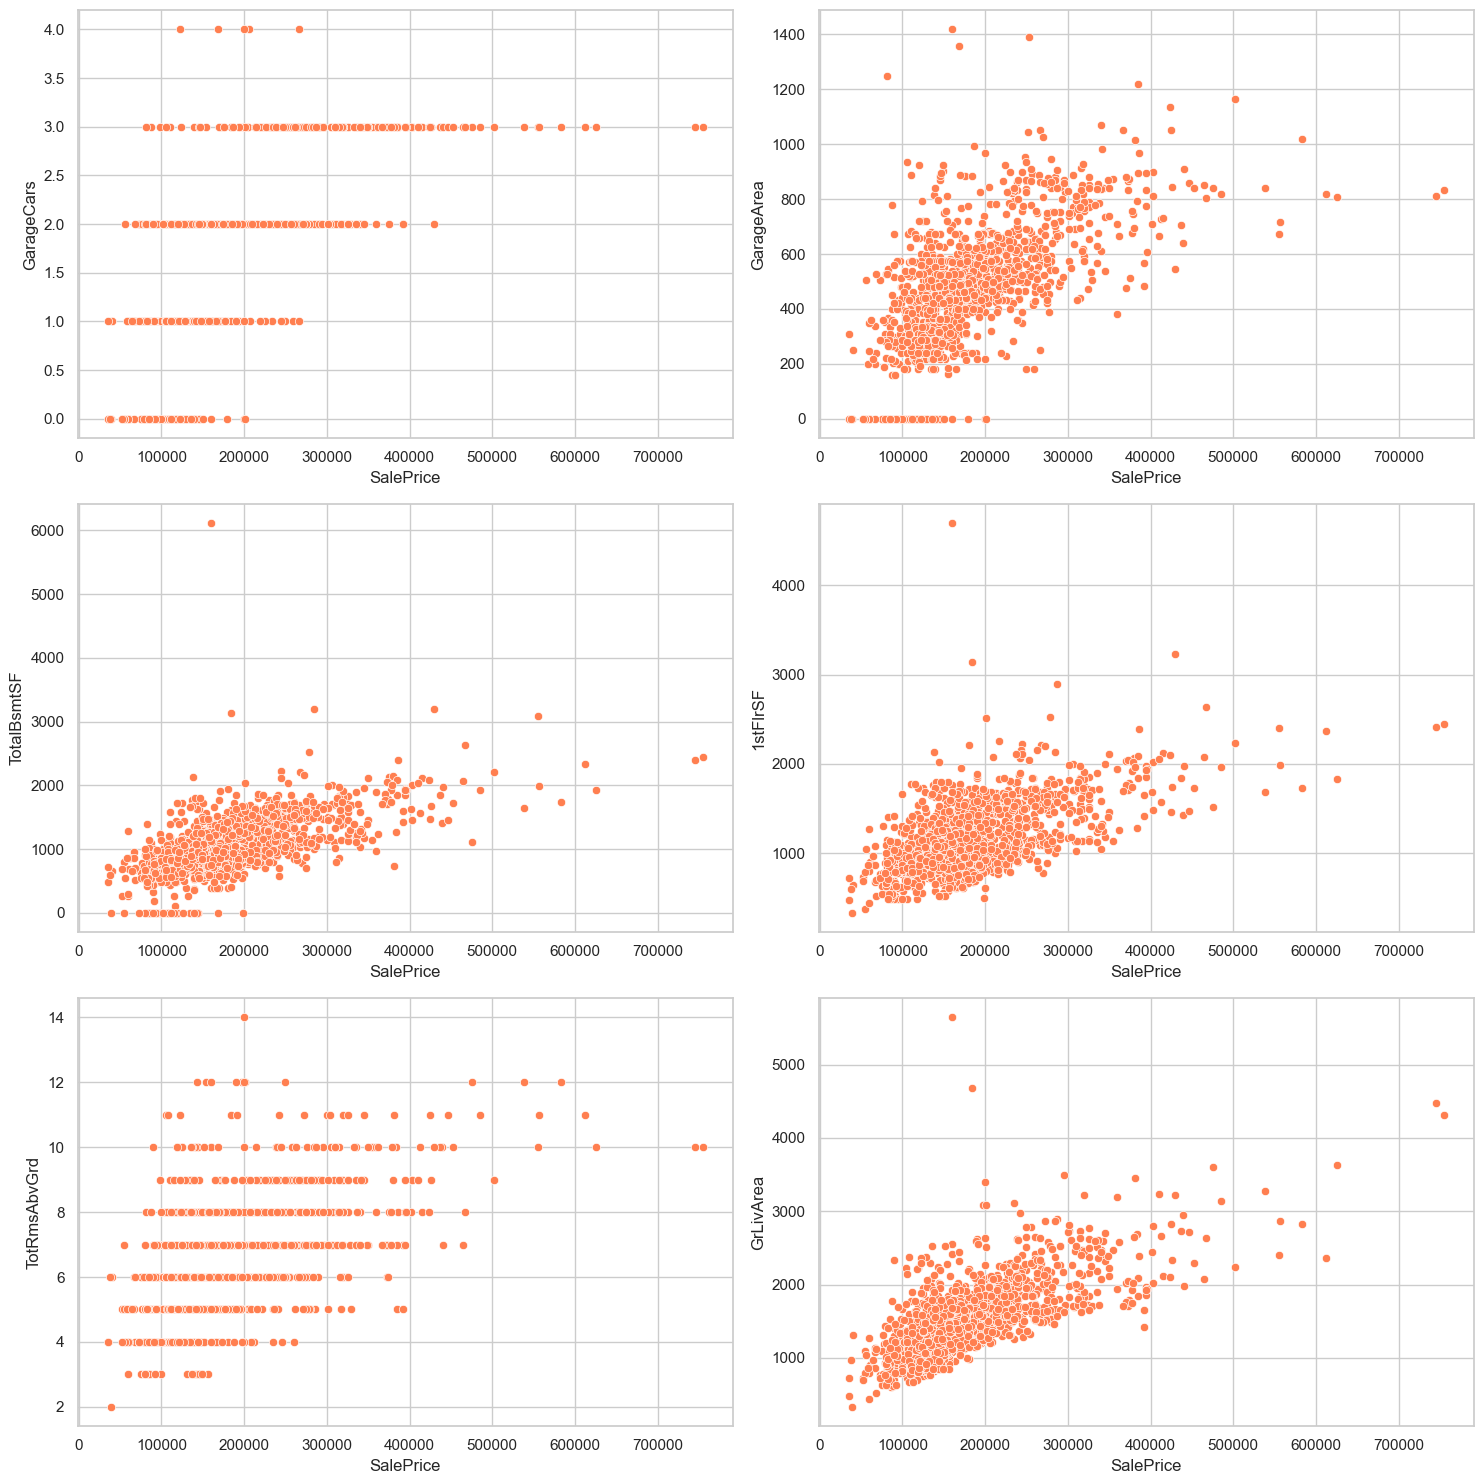

In [13]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
sns.scatterplot(x=train_n['SalePrice'], y=train_n['GarageCars'], ax=ax[0, 0], color='coral')
sns.scatterplot(x=train_n['SalePrice'], y=train_n['GarageArea'], ax=ax[0, 1], color='coral')
sns.scatterplot(x=train_n['SalePrice'], y=train_n['TotalBsmtSF'], ax=ax[1, 0], color='coral')
sns.scatterplot(x=train_n['SalePrice'], y=train_n['1stFlrSF'], ax=ax[1, 1], color='coral')
sns.scatterplot(x=train_n['SalePrice'], y=train_n['TotRmsAbvGrd'], ax=ax[2, 0], color='coral')
sns.scatterplot(x=train_n['SalePrice'], y=train_n['GrLivArea'], ax=ax[2, 1], color='coral')

fig.tight_layout()
plt.show()


In [14]:
train_n1=train_n.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1)
test_n1=test_n.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1)

In [15]:
non_linear=['MSSubClass','LotArea','OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr',
            'KitchenAbvGr','Fireplaces','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','MoSold', 'YrSold']
print("total non-linear",len(non_linear)," columns")

total non-linear 17  columns


In [16]:
linear_features=np.array([col for col in train_n1.columns if col not in non_linear])

In [17]:
linear_features

array(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'SalePrice'], dtype='<U13')

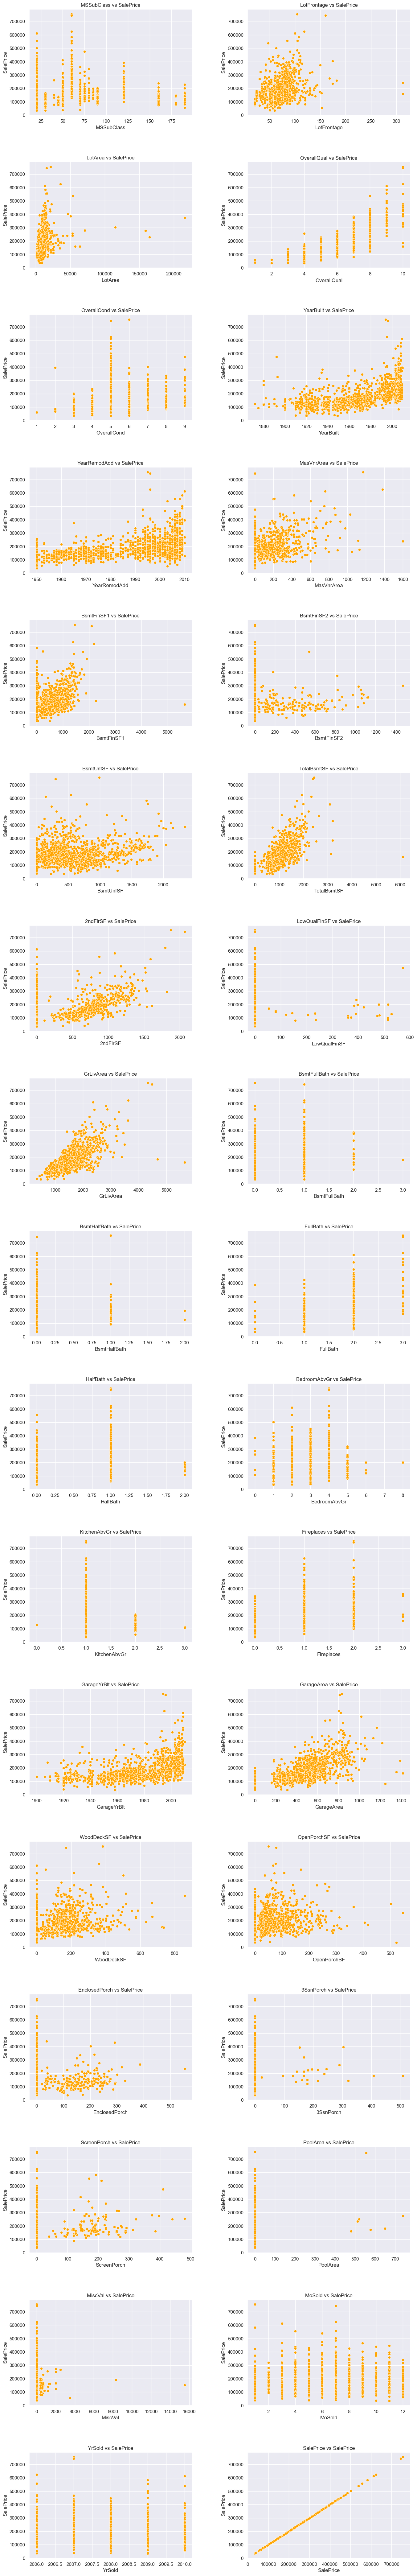

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

num_columns = len(train_n1.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows based on columns

fig, ax = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Adjust figsize

def graph(x, y, r, c, title):
    sns.scatterplot(data=train_n1, x=x, y=y, color='orange', ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    ax[r][c].set_ylabel("SalePrice")
    ax[r][c].set_title(title)

for r, col in enumerate(train_n1.columns):
    c = r % 2
    graph(col, train['SalePrice'], r // 2, c, f"{col} vs SalePrice")  # Adjust row index

# Adjust layout to prevent overlap
fig.tight_layout(pad=5.0)

plt.show()


# Misssing Values

<Axes: >

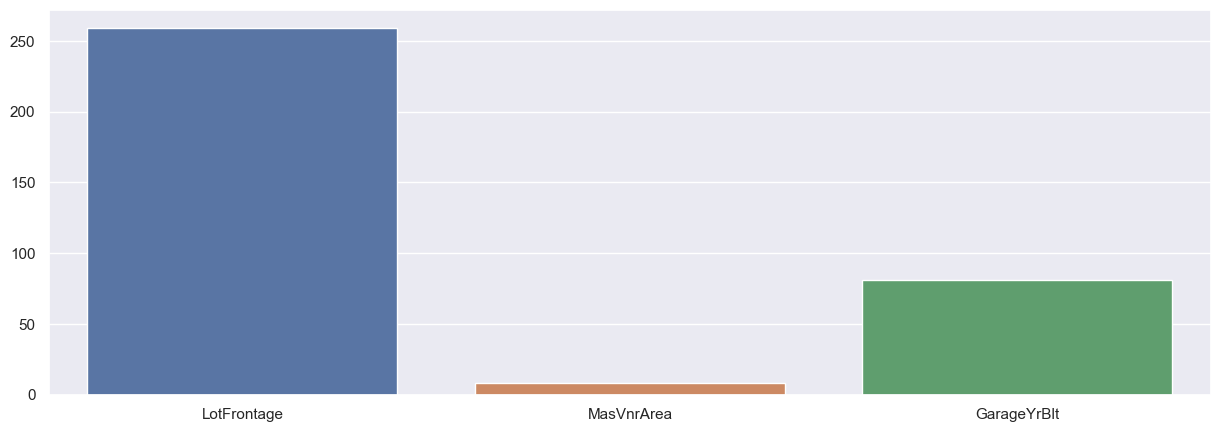

In [19]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
train_null=train_n1.isnull().sum()[train_n1.isnull().sum()!=0]
sns.barplot(x=train_null.index,y=train_null)

In [20]:
train_null

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

<Axes: >

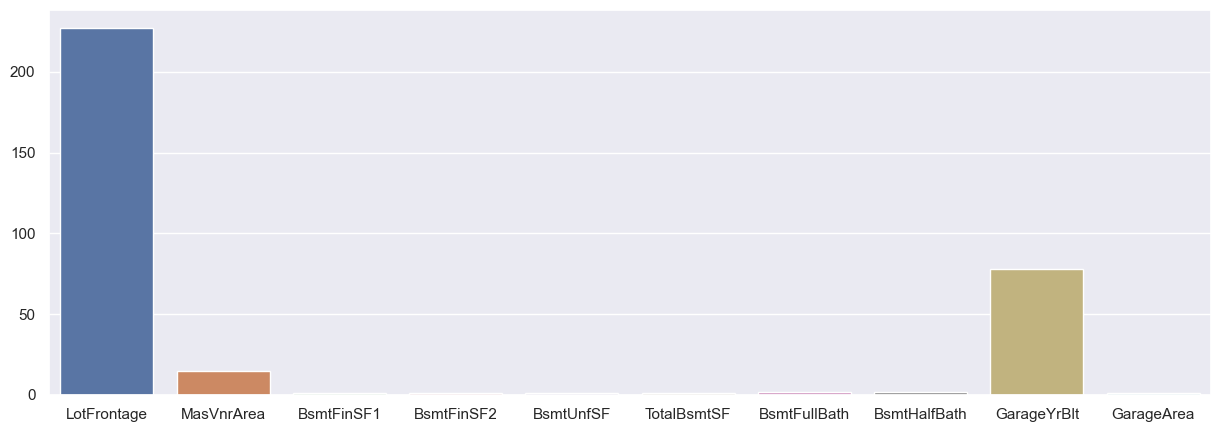

In [21]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
test_null=test_n1.isnull().sum()[test_n1.isnull().sum()!=0]
sns.barplot(x=test_null.index,y=test_null)

In [22]:
train_n1['GarageYrBlt']=train_n1['GarageYrBlt'].fillna(train_n1['GarageYrBlt'].median())
test_n1['GarageYrBlt']=test_n1['GarageYrBlt'].fillna(test_n1['GarageYrBlt'].median())

In [23]:
for col in train_n1.columns:
    train_n1[col] = train_n1[col].fillna(0)
for col in test_n1.columns:
    test_n1[col] = test_n1[col].fillna(0)

In [24]:
print(train_n1[linear_features].shape)
print(test_n1[linear_features[:-1]].shape)

(1460, 17)
(1459, 16)


In [25]:
train_n1.isnull().sum()[train_n1.isnull().sum()!=0]

Series([], dtype: int64)

In [26]:
test_n1.isnull().sum()[test_n1.isnull().sum()!=0]

Series([], dtype: int64)

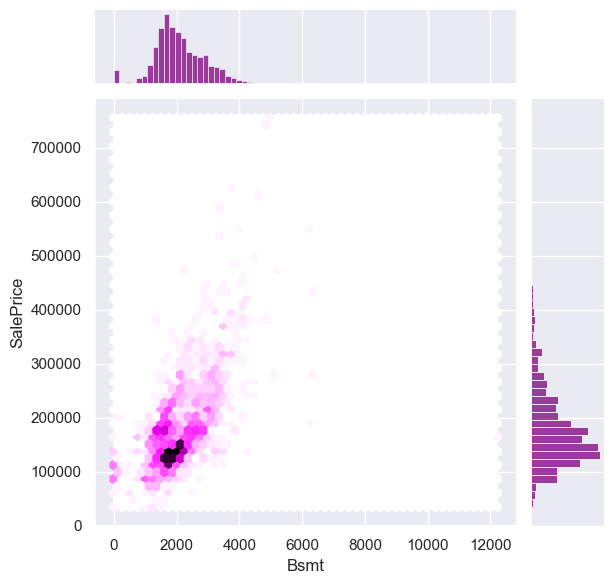

In [27]:
train_n1['Bsmt']=train_n1['BsmtFinSF1']+train_n1['BsmtFinSF2']+train_n1['BsmtUnfSF']+train_n1['TotalBsmtSF']
test_n1['Bsmt']=test_n1['BsmtFinSF1']+test_n1['BsmtFinSF2']+test_n1['BsmtUnfSF']+test_n1['TotalBsmtSF']
#sns.jointplot(train_n1['Bsmt'],train_n1['SalePrice'],kind='hex',color='purple')
sns.jointplot(x='Bsmt', y='SalePrice', data=train_n1, kind='hex', color='purple')


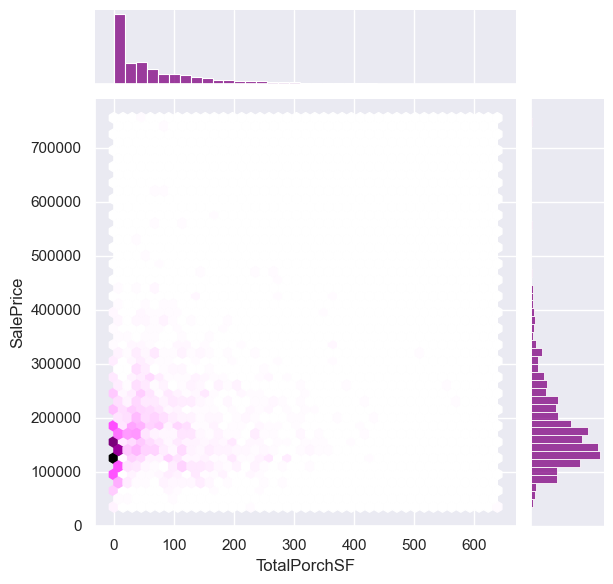

In [28]:
train_n1['TotalPorchSF']=train_n1['EnclosedPorch']+train_n1['OpenPorchSF']
test_n1['TotalPorchSF']=test_n1['EnclosedPorch']+test_n1['OpenPorchSF']

sns.jointplot(x ='TotalPorchSF',y='SalePrice',data = train_n1,kind='hex',color='purple')

In [29]:
linear_features=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea','Bsmt', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

In [30]:
train_n1[linear_features].columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Bsmt', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'],
      dtype='object')

In [31]:
train_n1[linear_features].shape

(1460, 13)

In [32]:
test_n1[linear_features].shape

(1459, 13)

# Outlier

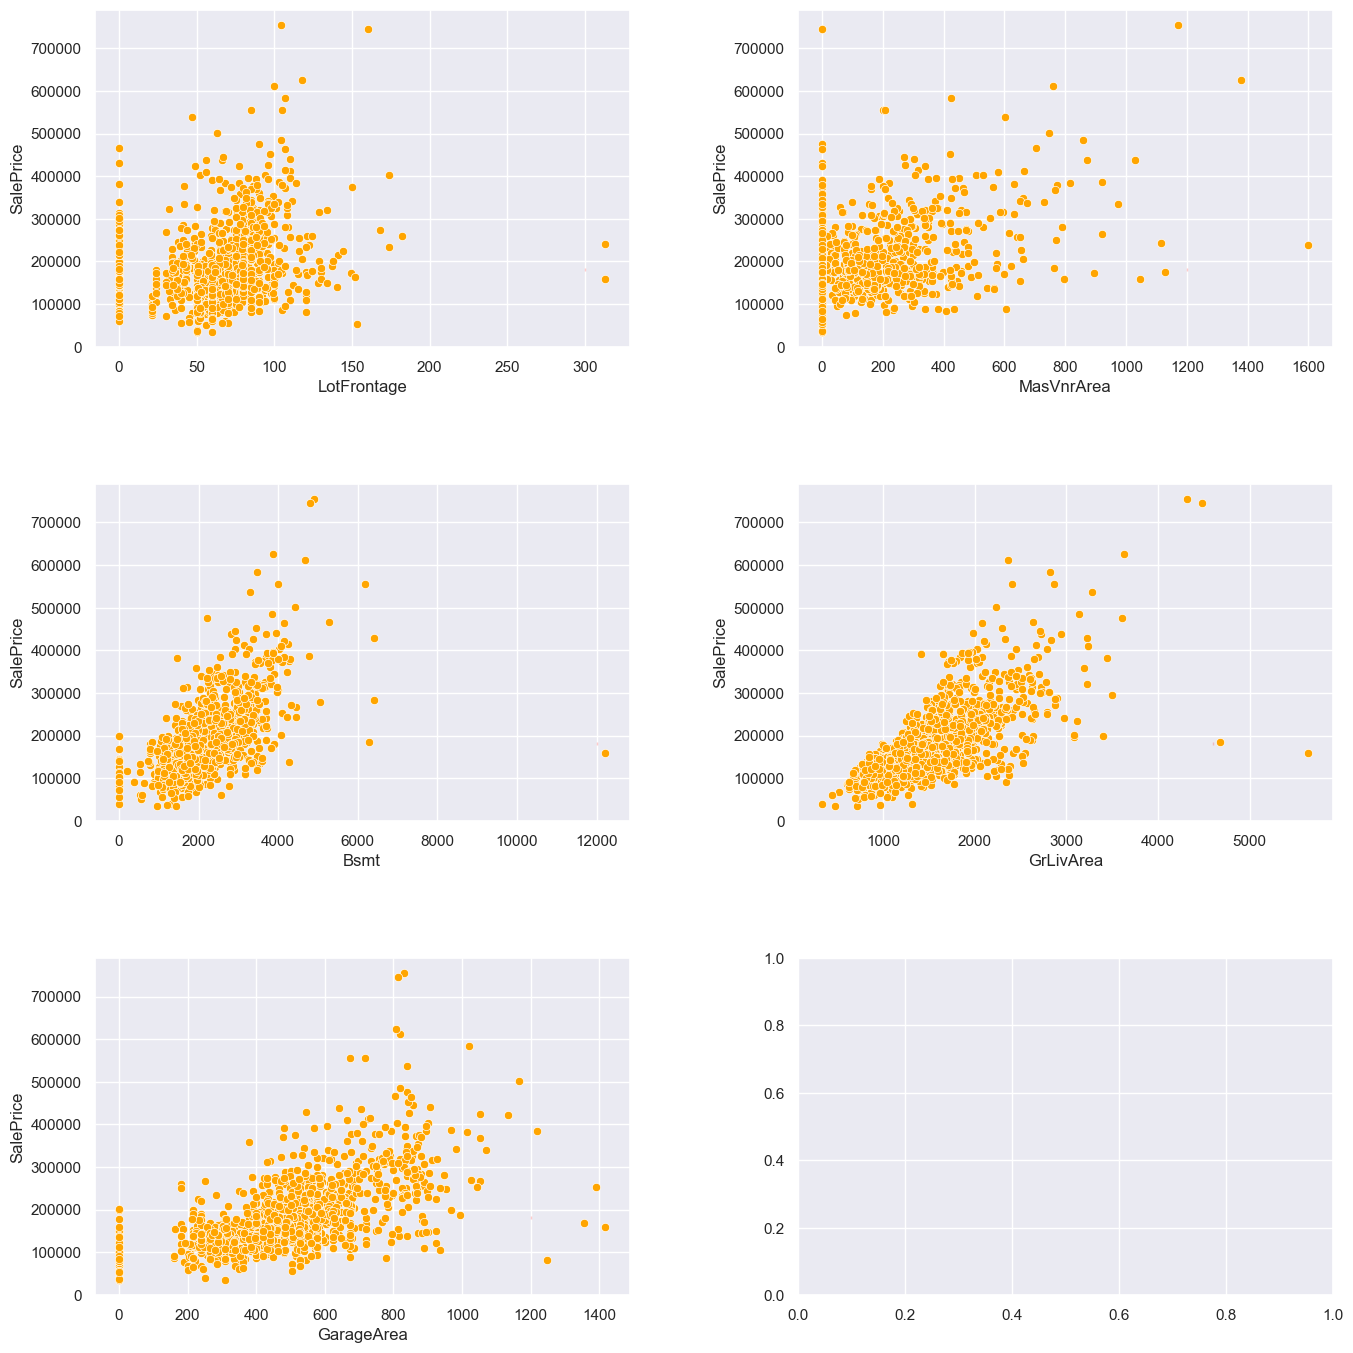

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

def graph(x, y, r, c, title, line):
    sns.scatterplot(data=train_n1, x=x, y=y, color='orange', ax=ax[r][c])
    sns.lineplot(x=line, y=train_n1[y], color='red', ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out = [300, 1200, 12000, 4600, 1200]
selected_columns = ['LotFrontage', 'MasVnrArea', 'Bsmt', 'GrLivArea', 'GarageArea']

for r, col in enumerate(selected_columns):
    c = r % 2
    graph(col, 'SalePrice', r // 2, c, col, out[r])


# Outlier

LotFrontage > 300

MasVnrArea > 1200

Bsmt > 12000

GrLivArea > 4600

GarageArea > 1200

SalePrice > 700000

In [34]:
a=train_n1['LotFrontage'].sort_values(ascending=False).head(2)
b=train_n1['MasVnrArea'].sort_values(ascending=False).head(2)
c=train_n1['Bsmt'].sort_values(ascending=False).head(1)
d=train_n1['GrLivArea'].sort_values(ascending=False).head(2)
e=train_n1['GarageArea'].sort_values(ascending=False).head(3)
f=train_n1['SalePrice'].sort_values(ascending=False).head(2)

In [35]:
print(a)

1298    313.0
934     313.0
Name: LotFrontage, dtype: float64


In [36]:
print(b)

297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64


In [37]:
print(a,b,c,d,e,f)

1298    313.0
934     313.0
Name: LotFrontage, dtype: float64 297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64 1298    12220
Name: Bsmt, dtype: int64 1298    5642
523     4676
Name: GrLivArea, dtype: int64 1298    1418
581     1390
1190    1356
Name: GarageArea, dtype: int64 691     755000
1182    745000
Name: SalePrice, dtype: int64


In [38]:
index=a.index
index=index.append(b.index)
index=index.append(c.index)
index=index.append(d.index)
index=index.append(e.index)
index=index.append(f.index)

In [39]:
index

Int64Index([1298, 934, 297, 1169, 1298, 1298, 523, 1298, 581, 1190, 691, 1182], dtype='int64')

In [40]:
train_n1=train_n1.drop(index).reset_index(drop=True)

In [41]:
print(train_n1.shape)
print(train_n1[linear_features].shape)

(1451, 36)
(1451, 13)


In [42]:
train_n1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Bsmt,TotalPorchSF
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,0,2,2008,208500,1712,61
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,5,2007,181500,2524,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,9,2008,223500,1840,42
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,272,0,0,0,0,2,2006,140000,1512,307
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,12,2008,250000,2290,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,0,8,2007,175000,1906,40
1447,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,2,2010,210000,3084,0
1448,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,2500,5,2010,266500,2304,60
1449,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,112,0,0,0,0,4,2010,142125,2156,112


# Skewing the features

In [43]:
Train_X_n=train_n1[linear_features]
Train_Y_n=train_n1['SalePrice']

In [44]:
Train_X_n.skew()

LotFrontage     -0.304896
OverallQual      0.178474
YearBuilt       -0.608484
YearRemodAdd    -0.496830
MasVnrArea       2.300035
Bsmt             0.483762
2ndFlrSF         0.766328
GrLivArea        0.811428
GarageYrBlt     -0.674187
GarageArea       0.047691
WoodDeckSF       1.555968
OpenPorchSF      2.339160
EnclosedPorch    3.077668
dtype: float64

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\4141966483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_Y_n,ax=ax[0],color='green')
C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\4141966483.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(Train_Y_n),ax=ax[1],color

<Axes: xlabel='SalePrice', ylabel='Density'>

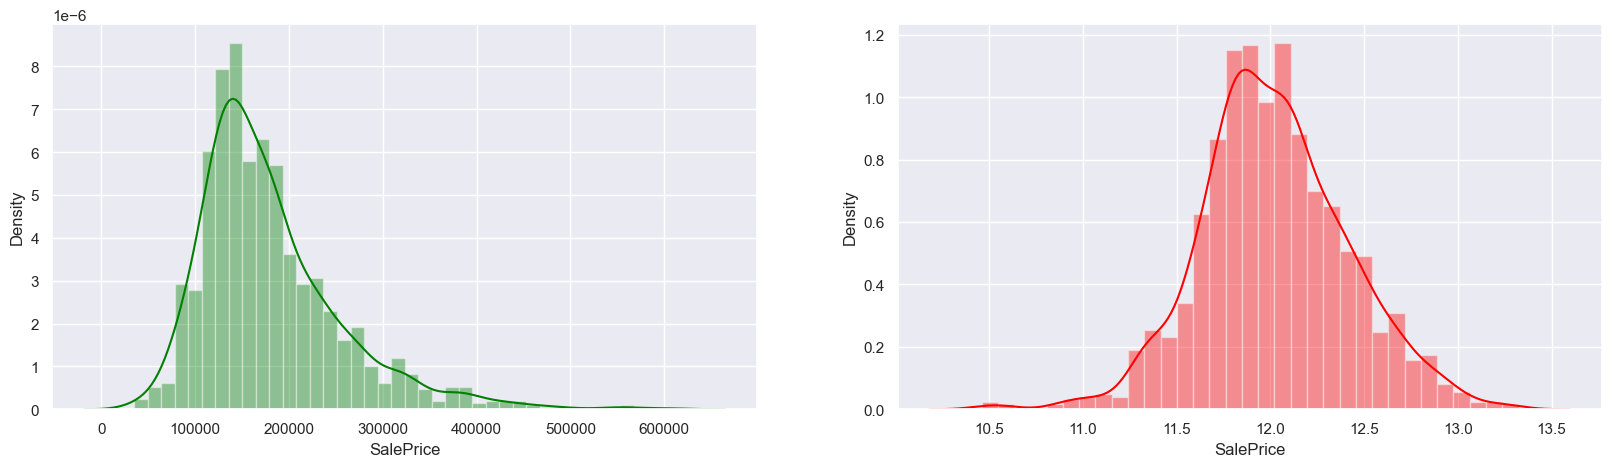

In [45]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_Y_n,ax=ax[0],color='green')
sns.distplot(np.log1p(Train_Y_n),ax=ax[1],color='red')

In [46]:
y_train=np.log1p(Train_Y_n)

In [47]:
Train_Y_n

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1446    175000
1447    210000
1448    266500
1449    142125
1450    147500
Name: SalePrice, Length: 1451, dtype: int64

In [48]:
y_train=np.log1p(Train_Y_n)

In [49]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1446    12.072547
1447    12.254868
1448    12.493133
1449    11.864469
1450    11.901590
Name: SalePrice, Length: 1451, dtype: float64

# Scaling

In [50]:
# scaler=StandardScaler()
scaler=RobustScaler()
final_train_n=pd.DataFrame(scaler.fit_transform(Train_X_n),columns=Train_X_n.columns)
final_test_n=pd.DataFrame(scaler.fit_transform(test_n1[linear_features]),columns=Train_X_n.columns)

In [51]:
final_train_n.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Bsmt,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0.054795,0.5,0.673913,0.263158,1.209877,-0.269618,1.173077,0.394104,0.589744,0.281690,0.000000,0.544118,0.0
1,0.465753,0.0,0.086957,-0.447368,0.000000,0.547284,0.000000,-0.301009,-0.102564,-0.072435,1.773810,-0.352941,0.0
2,0.136986,0.5,0.630435,0.236842,1.000000,-0.140845,1.189560,0.512025,0.538462,0.523139,0.000000,0.264706,0.0
3,-0.082192,0.5,-1.239130,-0.605263,0.000000,-0.470825,1.038462,0.404965,0.461538,0.659960,0.000000,0.161765,272.0
4,0.575342,1.0,0.608696,0.184211,2.160494,0.311871,1.446429,1.151280,0.512821,1.440644,1.142857,0.882353,0.0


In [52]:
final_test_n.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Bsmt,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0.500000,-0.5,-0.250000,-0.756098,0.000000,-0.203846,0.000000,-0.888152,-0.444444,0.967118,0.833333,-0.388889,0.0
1,0.529412,0.0,-0.312500,-0.829268,0.666667,0.655769,0.000000,-0.170671,-0.518519,-0.649903,2.339286,0.111111,0.0
2,0.323529,-0.5,0.500000,0.146341,0.000000,-0.115385,1.036982,0.326429,0.444444,0.007737,1.261905,0.083333,0.0
3,0.441176,0.0,0.520833,0.146341,0.123457,-0.119231,1.002959,0.285004,0.469136,-0.038685,2.142857,0.111111,0.0
4,-0.588235,1.0,0.395833,0.000000,0.000000,0.561538,0.000000,-0.251864,0.320988,0.100580,0.000000,0.750000,0.0


 # EDA on Categorical Features

In [53]:
train_c=train[[c for c in train.columns if train[c].dtypes=='O']].copy()
test_c=test[[c for c in test.columns if test[c].dtypes=='O']].copy()

<Axes: >

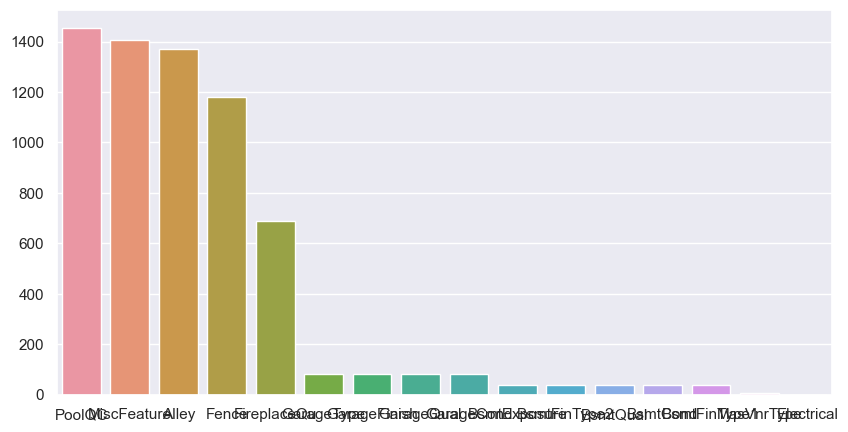

In [54]:
# print(train_c.shape)
fig=plt.figure(figsize=(10,5))
train_null=train_c.isnull().sum()[train_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(x=train_null.index,y=train_null)

<Axes: >

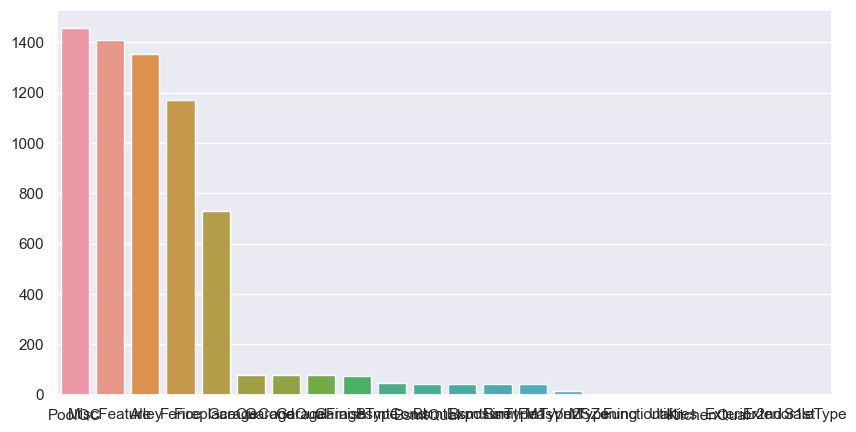

In [55]:
fig=plt.figure(figsize=(10,5))
test_null=test_c.isnull().sum()[test_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(x=test_null.index,y=test_null)

In [56]:
train_c.shape

(1460, 43)

In [57]:
train_c.dropna(thresh=len(train_c)*0.9,axis=1,inplace=True)

In [58]:
train_c.shape

(1460, 38)

In [59]:
test_c.dropna(thresh=len(test_c)*0.9,axis=1,inplace=True)

In [60]:
test_c.isnull().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

In [61]:
train_c.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [62]:
train_c['Electrical']=train_c['Electrical'].fillna(method='ffill')
test_c['SaleType']=test_c['SaleType'].fillna(method='ffill')
test_c['KitchenQual']=test_c['KitchenQual'].fillna(method='ffill')
test_c['Exterior1st']=test_c['Exterior1st'].fillna(method='ffill')
test_c['Exterior2nd']=test_c['Exterior2nd'].fillna(method='ffill')
test_c['Functional']=test_c['Functional'].fillna(method='ffill')
test_c['Utilities']=test_c['Utilities'].fillna(method='ffill')
test_c['MSZoning']=test_c['MSZoning'].fillna(method='ffill')

In [63]:
# Categorical missing values
for col in train_c.columns:
    train_c[col] = train_c[col].fillna("None")
for col in test_c.columns:
    test_c[col] = test_c[col].fillna("None")

In [64]:
print("Train null values : ",len(train_c.isnull().sum()[train_c.isnull().sum()!=0]))
print("Test null values : ",len(test_c.isnull().sum()[test_c.isnull().sum()!=0]))

Train null values :  0
Test null values :  0


In [65]:
train_c.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [66]:
train_c=train_c.drop(index).reset_index(drop=True)
train_c.shape

(1451, 38)

In [67]:
test_c.shape

(1459, 38)

In [68]:
num_train=train_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold']]
num_test=test_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold']]
print(num_train.shape)
print(num_test.shape)
numerical_categorical_feature=c = pd.concat((num_train,num_test),sort=False)
print(numerical_categorical_feature.shape)
numerical_categorical_feature=numerical_categorical_feature.astype('O')

(1451, 10)
(1459, 10)
(2910, 10)


In [69]:
numerical_categorical_feature

,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,BedroomAbvGr,Fireplaces,MoSold,YrSold
0,5,1.0,0.0,2,1,1,3,0,2,2008
1,8,0.0,1.0,2,0,1,3,1,5,2007
2,5,1.0,0.0,2,1,1,3,1,9,2008
3,5,1.0,0.0,1,0,1,3,1,2,2006
4,5,1.0,0.0,2,1,1,4,1,12,2008
...,...,...,...,...,...,...,...,...,...,...
1454,7,0.0,0.0,1,1,1,3,0,6,2006
1455,5,0.0,0.0,1,1,1,3,0,4,2006
1456,7,1.0,0.0,1,0,1,4,1,9,2006
1457,5,0.0,1.0,1,0,1,3,0,7,2006


<Axes: xlabel='OverallCond'>

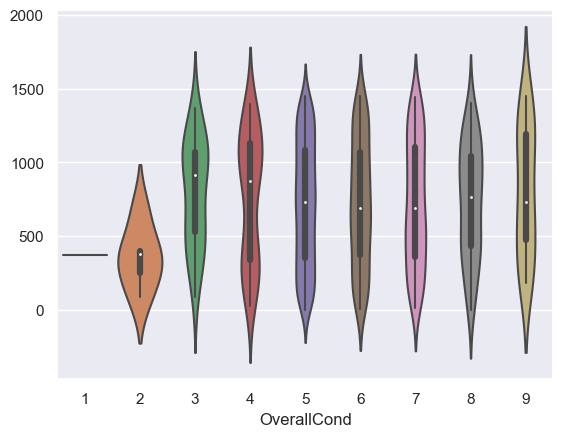

In [70]:
sns.violinplot(x=num_train['OverallCond'],y=num_train['OverallCond'].index)

In [71]:
numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\662480713.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\662480713.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\662480713.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_23472\662480713.py:1: FutureWarning: In a future version, the Index co

In [72]:
numerical_categorical_feature

,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_0.0,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1455,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1456,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1457,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [73]:
num_train_dummy=numerical_categorical_feature[:1451]
num_test_dummy=numerical_categorical_feature[1451:].reset_index(drop=True)
print(num_train_dummy.shape)
print(num_test_dummy.shape)

(1451, 58)
(1459, 58)


In [74]:
num_train_dummy

,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_0.0,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1447,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1448,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1449,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
c = pd.concat((train_c, test_c), sort=False).reset_index(drop=True)

In [76]:
c

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,None,None,None,None,Y,WD,Normal
2906,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
2907,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
2908,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,None,None,None,None,Y,WD,Normal


In [77]:
c1=pd.get_dummies(c)

In [78]:
final_train_c=c1.iloc[:train_c.shape[0]]
# final_train_c=final_train_c.drop(index).reset_index(drop=True)
final_train_c.shape

(1451, 242)

In [79]:
final_test_c=c1.iloc[train_c.shape[0]:]
final_test_c=final_test_c.reset_index(drop=True)
final_test_c.shape

(1459, 242)

# 2.4 merge the numerical_categorical_feature with final_test_c



In [80]:
final_train_c=final_train_c.merge(num_train_dummy,left_index=True,right_index=True)
final_test_c=final_test_c.merge(num_test_dummy,left_index=True,right_index=True)

In [81]:
final_test_c.shape

(1459, 300)

In [89]:
final_test_c

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [82]:
train_c_labeled=pd.DataFrame()
test_c_labeled=pd.DataFrame()

In [84]:
test_c_labeled

""


In [85]:
train_c

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1447,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1449,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [87]:
for col in train_c.columns:
    le = preprocessing.LabelEncoder()
    train_c_labeled[col]=le.fit_transform(train_c[col])
    test_c_labeled[col]=le.fit_transform(test_c[col])

In [88]:
train_c_labeled

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,2,5,5,2,8,4
1447,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,3,5,5,2,8,4
1448,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,2,5,5,2,8,4
1449,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,3,5,5,2,8,4


In [90]:
x_train=final_train_n.merge(final_train_c,left_index=True,right_index=True).reset_index(drop=True)
x_test=final_test_n.merge(final_test_c,left_index=True,right_index=True).reset_index(drop=True)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train,test_size = .3, random_state=0)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [94]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 


Root Mean Square Error train = 0.09293632684288558
Root Mean Square Error test = 0.09449830158697789


In [95]:
from sklearn.linear_model import Lasso

In [96]:
Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.0005} 0.9104352912144644


In [97]:
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(x_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

Root Mean Square Error train = 0.10221397297831317
Root Mean Square Error test = 0.10040464474527823


In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)



RandomForestRegressor(max_depth=25, n_estimators=33)


In [100]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 


Root Mean Square Error train = 0.055792492153140465
Root Mean Square Error test = 0.15254792984876664


In [104]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=27, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_depth=25, max_features='auto',
                      n_estimators=27)